In [1]:
import pandas as pd
import numpy as np

In [2]:
file = pd.read_csv(r'C:\Users\ydool\Downloads\Table 1-Grid view (4).csv')

In [3]:
file.drop('Name', axis=1, inplace=True)

In [4]:
#file.groupby(['Type of Workplace','Experience'])['Monthly Gross Salary (Bruto)'].min()

In [5]:
#file.info()

In [6]:
file['Monthly Gross Salary (Bruto)'].fillna(0, inplace=True)
file['Extra Benefits'].fillna(0, inplace=True)
file['Hourly Salary Rate'].fillna(0, inplace=True)
file['Total Salary'] = file['Monthly Gross Salary (Bruto)']  + file['Hourly Salary Rate'] #+ file['Extra Benefits']
    

In [7]:
# def job_titler(cols):
#     data_labeling = cols[0]
#     people_management = cols[1]
#     vendor_management = cols[2]
#     quality_validation = cols[3]
#     collection = cols[4]
#     curation = cols[5]
#     if (data_labeling == 'Yes' || collection=='Yes' || curation=='Yes'):
#         if (people_management=='No' & vendor_management=='No' & quality_validation=='No'):
#             return 'Data Labeling/Collection/Curation Role'
#         else:
#             return 'Hands-on Data Management Role'


In [8]:
#file.groupby(['Experience','Type of Workplace','People Management'])['Total Salary'].min().reset_index()

In [9]:
#file.groupby(['Experience','Type of Workplace','People Management'])['Total Salary'].max().reset_index()

In [10]:
#file.groupby(['Experience','Type of Workplace','People Management'])['Total Salary'].count().reset_index()

In [11]:
def group_and_summarize(df, group_cols, num_col):
    """
    Groups by the specified columns and calculates the range (min-max),
    median, and count for the numerical column. The Count column will indicate
    "Less than 3" if the count is below 3.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - group_cols (list of str): List of column names to group by (categorical).
    - num_col (str): Name of the numerical column to summarize.
    
    Returns:
    - pd.DataFrame: Summary DataFrame with range, median, and modified count.
    """
    # Group by the specified columns and calculate min, max, median, and count
    grouped_df = df.groupby(group_cols)[num_col].agg(['min', 'max', 'median', 'count']).reset_index()
    
    # Create a new column for the range as 'min-max' and format numbers with commas
    grouped_df['Range'] = grouped_df['min'].apply(lambda x: f"{int(x):,}") + " - " + grouped_df['max'].apply(lambda x: f"{int(x):,}")
    
    # Format Median with commas
    grouped_df['Median'] = grouped_df['median'].apply(lambda x: f"{int(x):,}")
    
    # Modify Count to display "Less than 3" or the formatted count
    grouped_df['Comment'] = grouped_df['count'].apply(lambda x: "Less than 3 people in this group" if x < 3 else '')
    
    # Reorder columns to place Range, Median, and Count as needed
    grouped_df = grouped_df[group_cols + ['Range', 'Median', 'Comment']]
    
    # Return the DataFrame without an index
    return grouped_df.style.hide_index()

In [12]:
group_and_summarize(file[file['Hourly Salary Rate']==0],['Type of Workplace','Experience'],'Total Salary' )

Type of Workplace,Experience,Range,Median,Comment
Big Startup (More than 200 Employees),3-5 Years,"18,000 - 20,000","19,000",
Enterprise/Corporate,0-2 Years,"16,000 - 19,000","19,000",
Enterprise/Corporate,10+ Years,"18,900 - 20,000","19,450",Less than 3 people in this group
Enterprise/Corporate,3-5 Years,"11,000 - 30,000","22,500",
Enterprise/Corporate,6-9 Years,"17,000 - 30,000","26,000",
Medium Startup (41-200 Employees),0-2 Years,"12,000 - 28,000","16,000",
Medium Startup (41-200 Employees),10+ Years,"14,000 - 36,500","33,000",
Medium Startup (41-200 Employees),3-5 Years,"13,000 - 30,000","19,750",
Medium Startup (41-200 Employees),6-9 Years,"25,000 - 25,000","25,000",Less than 3 people in this group
Other,6-9 Years,"33,500 - 33,500","33,500",Less than 3 people in this group


In [13]:
#file.info()

In [14]:
file['Hands-on'].unique()

array(['Most/all of my work is hands on', '~50% of my work is hands on',
       'Less than 20% of my work is hands on'], dtype=object)

In [15]:
special_knowledge = file[file['Special Knowledge']=='Yes'].copy()
regular_knowledge = file[file['Special Knowledge']=='No'].copy()

In [16]:
group_and_summarize(special_knowledge,['Type of Workplace','Experience'],'Total Salary' )

Type of Workplace,Experience,Range,Median,Comment
Enterprise/Corporate,3-5 Years,"17,500 - 17,500","17,500",Less than 3 people in this group
Enterprise/Corporate,6-9 Years,"17,000 - 30,000","23,500",Less than 3 people in this group
Medium Startup (41-200 Employees),0-2 Years,"18,000 - 28,000","23,000",Less than 3 people in this group
Medium Startup (41-200 Employees),10+ Years,"36,500 - 36,500","36,500",Less than 3 people in this group
Medium Startup (41-200 Employees),3-5 Years,"18,500 - 21,000","21,000",
Small Startup (up to 40 Employees),10+ Years,"23,500 - 23,500","23,500",Less than 3 people in this group
Small Startup (up to 40 Employees),3-5 Years,"20,000 - 23,000","21,500",Less than 3 people in this group
Small Startup (up to 40 Employees),6-9 Years,"29,000 - 29,000","29,000",Less than 3 people in this group


In [17]:
special_knowledge['Hourly Salary Rate'].unique()

array([0.])

In [18]:
#special_knowledge[special_knowledge['People Management']=='No']

In [19]:
hourly_salary = regular_knowledge[regular_knowledge['Hourly Salary Rate']>0].copy()

In [20]:
#hourly_salary

In [21]:
group_and_summarize(hourly_salary,['Type of Workplace','Experience'],'Total Salary' )

Type of Workplace,Experience,Range,Median,Comment
Big Startup (More than 200 Employees),0-2 Years,50 - 50,50,Less than 3 people in this group
Big Startup (More than 200 Employees),3-5 Years,56 - 56,56,Less than 3 people in this group
Medium Startup (41-200 Employees),0-2 Years,50 - 50,50,Less than 3 people in this group


In [22]:
global_salary = regular_knowledge[regular_knowledge['Hourly Salary Rate']==0].copy()

In [23]:

no_management = global_salary[global_salary['People Management']=='No'].copy()

In [24]:
#no_management.info()

In [25]:
group_and_summarize(no_management,['Experience','Technical Skills'],'Total Salary' )

Experience,Technical Skills,Range,Median,Comment
0-2 Years,Moderately Technical,"7,500 - 19,000","13,250",Less than 3 people in this group
0-2 Years,Non-Technical,"10,000 - 10,000","10,000",Less than 3 people in this group
0-2 Years,Somewhat Technical,"12,000 - 16,500","14,618",
10+ Years,Somewhat Technical,"14,000 - 20,000","18,900",
3-5 Years,Moderately Technical,"20,000 - 25,500","22,500",
3-5 Years,Somewhat Technical,"15,000 - 20,000","17,500",Less than 3 people in this group
3-5 Years,Very Technical,"13,000 - 13,000","13,000",Less than 3 people in this group
6-9 Years,Moderately Technical,"28,000 - 28,000","28,000",Less than 3 people in this group
6-9 Years,Somewhat Technical,"25,000 - 25,000","25,000",Less than 3 people in this group
6-9 Years,Very Technical,"24,000 - 24,000","24,000",Less than 3 people in this group


In [26]:
group_and_summarize(no_management,['Experience','Hands-on'],'Total Salary' )

Experience,Hands-on,Range,Median,Comment
0-2 Years,Most/all of my work is hands on,"7,500 - 12,000","9,750",Less than 3 people in this group
0-2 Years,~50% of my work is hands on,"10,000 - 19,000","16,000",
10+ Years,Most/all of my work is hands on,"14,000 - 20,000","17,000",Less than 3 people in this group
10+ Years,~50% of my work is hands on,"18,900 - 18,900","18,900",Less than 3 people in this group
3-5 Years,Less than 20% of my work is hands on,"25,000 - 25,000","25,000",Less than 3 people in this group
3-5 Years,Most/all of my work is hands on,"13,000 - 15,000","14,000",Less than 3 people in this group
3-5 Years,~50% of my work is hands on,"20,000 - 25,500","20,000",
6-9 Years,Most/all of my work is hands on,"24,000 - 28,000","25,000",


In [27]:
group_and_summarize(no_management,['Type of Workplace','Experience'],'Total Salary' )

Type of Workplace,Experience,Range,Median,Comment
Big Startup (More than 200 Employees),3-5 Years,"20,000 - 20,000","20,000",Less than 3 people in this group
Enterprise/Corporate,0-2 Years,"16,000 - 19,000","17,500",Less than 3 people in this group
Enterprise/Corporate,10+ Years,"18,900 - 20,000","19,450",Less than 3 people in this group
Enterprise/Corporate,3-5 Years,"20,000 - 25,500","22,750",Less than 3 people in this group
Enterprise/Corporate,6-9 Years,"24,000 - 28,000","26,000",Less than 3 people in this group
Medium Startup (41-200 Employees),0-2 Years,"12,000 - 12,000","12,000",Less than 3 people in this group
Medium Startup (41-200 Employees),10+ Years,"14,000 - 14,000","14,000",Less than 3 people in this group
Medium Startup (41-200 Employees),3-5 Years,"13,000 - 25,000","15,000",
Medium Startup (41-200 Employees),6-9 Years,"25,000 - 25,000","25,000",Less than 3 people in this group
Small Startup (up to 40 Employees),0-2 Years,"7,500 - 16,500","11,618",


In [28]:
people_manager = file[file['People Management']=='Yes'].copy()
people_manage_specia_knowledge = people_manager[people_manager['Special Knowledge']=='Yes'].copy()

In [29]:
group_and_summarize(people_manage_specia_knowledge,['Type of Workplace','Experience', 'Team Size'],'Total Salary' )

Type of Workplace,Experience,Team Size,Range,Median,Comment
Enterprise/Corporate,6-9 Years,Over 12 people,"17,000 - 17,000","17,000",Less than 3 people in this group
Enterprise/Corporate,6-9 Years,Up to 5 people,"30,000 - 30,000","30,000",Less than 3 people in this group
Medium Startup (41-200 Employees),0-2 Years,Between 6 and 12 people,"28,000 - 28,000","28,000",Less than 3 people in this group
Medium Startup (41-200 Employees),10+ Years,Up to 5 people,"36,500 - 36,500","36,500",Less than 3 people in this group
Medium Startup (41-200 Employees),3-5 Years,Between 6 and 12 people,"21,000 - 21,000","21,000",Less than 3 people in this group
Medium Startup (41-200 Employees),3-5 Years,Up to 5 people,"18,500 - 21,000","19,750",Less than 3 people in this group
Small Startup (up to 40 Employees),10+ Years,Up to 5 people,"23,500 - 23,500","23,500",Less than 3 people in this group
Small Startup (up to 40 Employees),3-5 Years,Up to 5 people,"23,000 - 23,000","23,000",Less than 3 people in this group
Small Startup (up to 40 Employees),6-9 Years,Between 6 and 12 people,"29,000 - 29,000","29,000",Less than 3 people in this group


In [30]:
group_and_summarize(people_manage_specia_knowledge,['Type of Workplace', 'Hands-on'],'Total Salary' )

Type of Workplace,Hands-on,Range,Median,Comment
Enterprise/Corporate,~50% of my work is hands on,"17,000 - 30,000","23,500",Less than 3 people in this group
Medium Startup (41-200 Employees),Less than 20% of my work is hands on,"21,000 - 28,000","24,500",Less than 3 people in this group
Medium Startup (41-200 Employees),Most/all of my work is hands on,"21,000 - 21,000","21,000",Less than 3 people in this group
Medium Startup (41-200 Employees),~50% of my work is hands on,"18,500 - 36,500","27,500",Less than 3 people in this group
Small Startup (up to 40 Employees),~50% of my work is hands on,"23,000 - 29,000","23,500",


In [31]:
people_manage_regular_knowledge = people_manager[people_manager['Special Knowledge']=='No'].copy()

In [32]:
group_and_summarize(people_manage_regular_knowledge,['Type of Workplace','Experience', 'Team Size'],'Total Salary' )

Type of Workplace,Experience,Team Size,Range,Median,Comment
Big Startup (More than 200 Employees),3-5 Years,Up to 5 people,"18,000 - 18,000","18,000",Less than 3 people in this group
Enterprise/Corporate,0-2 Years,Up to 5 people,"19,000 - 19,000","19,000",Less than 3 people in this group
Enterprise/Corporate,3-5 Years,Between 6 and 12 people,"25,000 - 25,000","25,000",Less than 3 people in this group
Enterprise/Corporate,3-5 Years,Up to 5 people,"11,000 - 30,000","20,500",Less than 3 people in this group
Medium Startup (41-200 Employees),0-2 Years,Up to 5 people,"15,000 - 16,000","15,500",Less than 3 people in this group
Medium Startup (41-200 Employees),10+ Years,Over 12 people,"33,000 - 33,000","33,000",Less than 3 people in this group
Medium Startup (41-200 Employees),3-5 Years,Up to 5 people,"18,000 - 30,000","24,000",Less than 3 people in this group
Other,6-9 Years,Up to 5 people,"33,500 - 33,500","33,500",Less than 3 people in this group
Small Startup (up to 40 Employees),0-2 Years,Between 6 and 12 people,"11,000 - 11,000","11,000",Less than 3 people in this group
Small Startup (up to 40 Employees),10+ Years,Up to 5 people,"30,000 - 30,000","30,000",Less than 3 people in this group


In [33]:
group_and_summarize(people_manage_regular_knowledge,['Type of Workplace', 'Hands-on'],'Total Salary' )

Type of Workplace,Hands-on,Range,Median,Comment
Big Startup (More than 200 Employees),Most/all of my work is hands on,"18,000 - 18,000","18,000",Less than 3 people in this group
Big Startup (More than 200 Employees),~50% of my work is hands on,"18,000 - 18,000","18,000",Less than 3 people in this group
Enterprise/Corporate,Less than 20% of my work is hands on,"25,000 - 30,000","27,500",Less than 3 people in this group
Enterprise/Corporate,Most/all of my work is hands on,"19,000 - 19,000","19,000",Less than 3 people in this group
Enterprise/Corporate,~50% of my work is hands on,"11,000 - 11,000","11,000",Less than 3 people in this group
Medium Startup (41-200 Employees),Less than 20% of my work is hands on,"18,000 - 18,000","18,000",Less than 3 people in this group
Medium Startup (41-200 Employees),Most/all of my work is hands on,"30,000 - 30,000","30,000",Less than 3 people in this group
Medium Startup (41-200 Employees),~50% of my work is hands on,"15,000 - 33,000","16,000",
Other,Less than 20% of my work is hands on,"33,500 - 33,500","33,500",Less than 3 people in this group
Small Startup (up to 40 Employees),Less than 20% of my work is hands on,"20,000 - 30,000","26,000",


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data into a pandas DataFrame
df = pd.read_csv(r'C:\Users\ydool\Downloads\Table 1-Grid view (4).csv')


# Clean and prepare the data
df = df.dropna(subset=['Monthly Gross Salary (Bruto)'])
df['Monthly Gross Salary (Bruto)'] = df['Monthly Gross Salary (Bruto)'].astype(float)

# Create ordered categorical type for Technical Skills
skill_order = ['Non-Technical', 'Somewhat Technical', 'Moderately Technical', 'Very Technical']
df['Technical Skills'] = pd.Categorical(df['Technical Skills'], categories=skill_order, ordered=True)

# Salary statistics
salary_mean = df['Monthly Gross Salary (Bruto)'].mean()
salary_median = df['Monthly Gross Salary (Bruto)'].median()
salary_min = df['Monthly Gross Salary (Bruto)'].min()
salary_max = df['Monthly Gross Salary (Bruto)'].max()

print(f'Average Salary: {salary_mean:.2f} ILS')
print(f'Median Salary: {salary_median:.2f} ILS')
print(f'Minimum Salary: {salary_min:.2f} ILS')
print(f'Maximum Salary: {salary_max:.2f} ILS')

# Set style for better visibility
plt.style.use('seaborn')

# Salary distribution histogram with more x-axis labels
plt.figure(figsize=(12, 6))
sns.histplot(data = df['Monthly Gross Salary (Bruto)'], bins=30) #, kde=True)
plt.xlabel('Monthly Gross Salary (ILS)')
plt.ylabel('Density')
plt.title('Distribution of Salaries')

# Create more x-axis ticks
min_salary = df['Monthly Gross Salary (Bruto)'].min()
max_salary = df['Monthly Gross Salary (Bruto)'].max()
plt.xticks(np.arange(5000, max_salary + 5000, 2500), rotation=45)

plt.tight_layout()
plt.savefig('salary_histogram.png')

# Salary by experience level
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Experience', y='Monthly Gross Salary (Bruto)', data=df)
plt.xlabel('Years of Experience')
plt.ylabel('Average Salary (ILS)')
plt.title('Salary by Experience Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('salary_by_experience.png')

# Salary by workplace type
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Type of Workplace', y='Monthly Gross Salary (Bruto)', data=df)
plt.xlabel('Workplace Type')
plt.ylabel('Average Salary (ILS)')
plt.title('Salary by Workplace Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('salary_by_workplace.png')

# Salary by technical skills (ordered)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Technical Skills', y='Monthly Gross Salary (Bruto)', data=df, order=skill_order)
plt.xlabel('Technical Skill Level')
plt.ylabel('Average Salary (ILS)')
plt.title('Salary by Technical Skill Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('salary_by_technical_skills.png')

# Salary by experience and workplace type
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Type of Workplace', y='Monthly Gross Salary (Bruto)', hue='Experience', data=df)
plt.xlabel('Workplace Type')
plt.ylabel('Average Salary (ILS)')
plt.title('Salary by Workplace Type and Experience Level')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('salary_by_workplace_and_experience.png')

# Salary by technical skills and workplace type
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Type of Workplace', y='Monthly Gross Salary (Bruto)', hue='Technical Skills', data=df, hue_order=skill_order)
plt.xlabel('Workplace Type')
plt.ylabel('Average Salary (ILS)')
plt.title('Salary by Workplace Type and Technical Skills')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('salary_by_workplace_and_technical_skills.png')

Average Salary: 20983.70 ILS
Median Salary: 20000.00 ILS
Minimum Salary: 7500.00 ILS
Maximum Salary: 36500.00 ILS


AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 864x432 with 0 Axes>

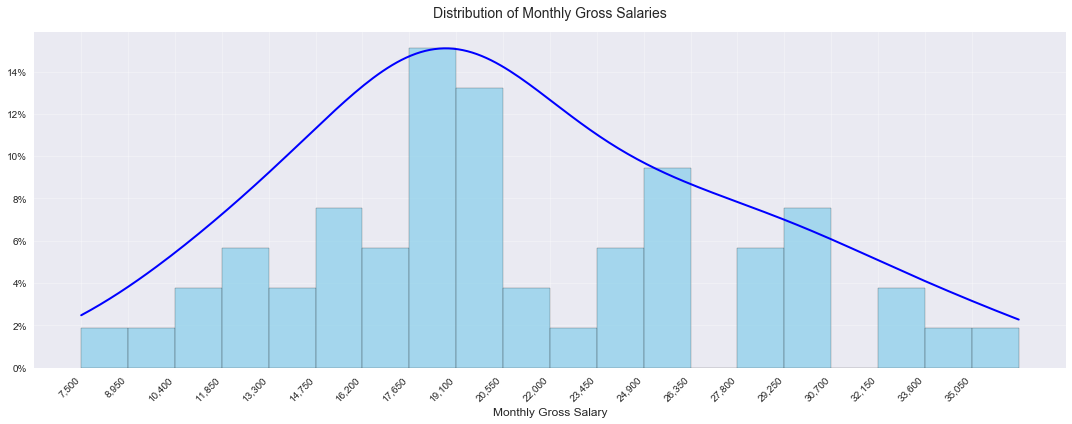

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np

# Extract salaries from the data
salaries = df['Monthly Gross Salary (Bruto)'].to_list()

# Create the plot with improved styling
plt.figure(figsize=(15, 6))

# Histogram
weights = np.ones_like(salaries) / len(salaries) * 100
counts, bins, _ = plt.hist(salaries, bins=20, weights=weights, color='skyblue', edgecolor='black', alpha=0.7)

# Kernel Density Estimation for trend line
kde = gaussian_kde(salaries)
x_range = np.linspace(min(salaries), max(salaries), 200)
trend_line = kde(x_range)
# Scale trend line to match histogram percentages
trend_line = trend_line / trend_line.max() * counts.max()
plt.plot(x_range, trend_line, color='blue', linewidth=2)

# Set the tick locations at the start of each bin
plt.xticks(bins[:-1], ['{:,.0f}'.format(b) for b in bins[:-1]], rotation=45, ha='right')

# Customize the plot
plt.title('Distribution of Monthly Gross Salaries', fontsize=14, pad=15)
plt.xlabel('Monthly Gross Salary', fontsize=12)
#plt.ylabel('Percentage of Employees (%)', fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Format y-axis labels to show integer percentages
y_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:0.0f}%'.format(y) for y in y_values])

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()